# Problem 4
## 1.

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

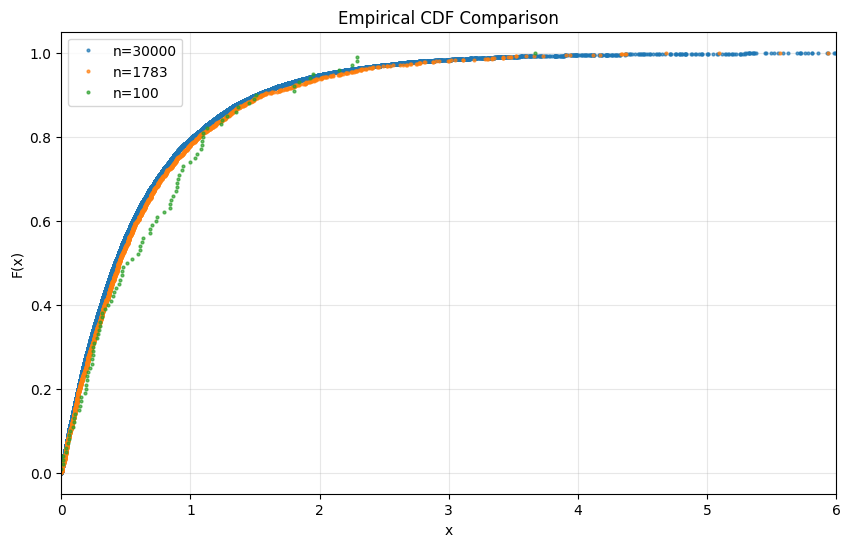

In [ ]:
C = None
X = []
l0 = 2 # chose arbitrary rates, can be adjusted
l1 = 1

plt.figure(figsize=(10, 6))

for n in [30000, 1783, 100]:
    for _ in range(n):
        r1 = random.random()
        if r1 <= 0.3:      # P(C=1) = 0.3
            C = 1
            X.append(np.random.exponential(scale=1/l1))
        else:
            C = 0
            X.append(np.random.exponential(scale=1/l0))

    X_sorted = np.sort(X)
    Y = np.arange(1, len(X_sorted) + 1) / len(X_sorted)

    plt.plot(X_sorted, Y, marker='o', linestyle='none', markersize=2, label=f'n={n}', alpha=0.7)
    X.clear()

plt.title('Empirical CDF Comparison')
plt.xlim(0, 6)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 2.

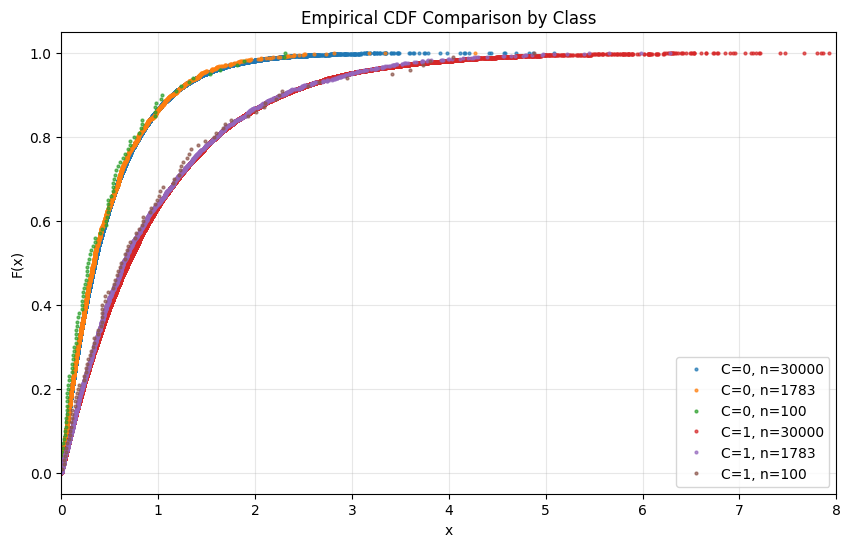

In [57]:
plt.figure(figsize=(10, 6))

for j in [0, 1]:
    for n in [30000, 1783, 100]:
        X1 = np.random.exponential(scale=1/(l1 if j == 1 else l0), size=n)

        X1_sorted = np.sort(X1)
        Y1 = np.arange(1, len(X1_sorted) + 1) / len(X1_sorted)
        plt.plot(X1_sorted, Y1, marker='o', linestyle='none', markersize=2, 
                 label=f'C={j}, n={n}', alpha=0.7)

plt.title('Empirical CDF Comparison by Class')
plt.xlim(0, 8)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Problem 5
## 1.

In [ ]:
sims = [i for i in range(10, 10**6, 10000)]

mu = []
s_2 = []
C2 = []

for i in range(len(sims)):
    X2 = [random.lognormvariate(0, 1) for _ in range(sims[i])] # take samples increasing sizes

    alpha = 1 # Choose value > 0
    mu.append(np.mean(X2))
    s_2.append(np.sum((X2 - mu[-1])**2) / (len(X2) - 1))

    C2.append(mu[-1] + alpha * np.sqrt(s_2[-1])) # formula for C
    #print(C2[-1])

## 2.

Average mu: 1.6486761654994886, Average s_2: 4.686118482827552, Average C2: 3.8129910797851316


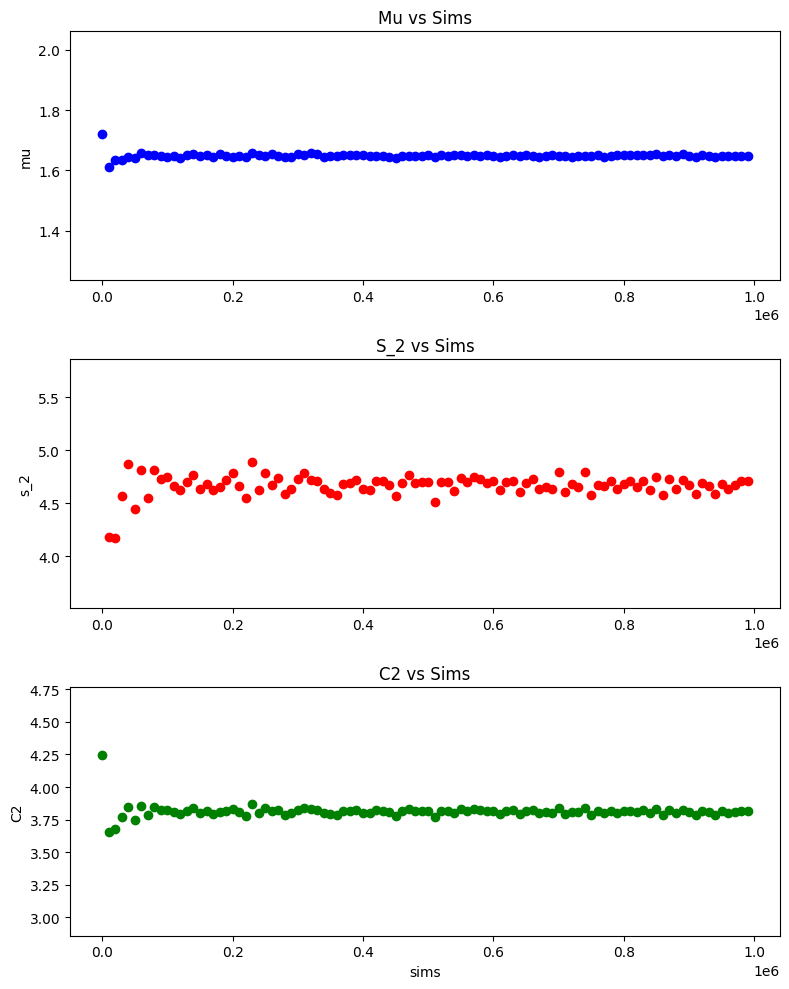

In [83]:
print(f"Average mu: {np.mean(mu)}, Average s_2: {np.mean(s_2)}, Average C2: {np.mean(C2)}")

fig, axes = plt.subplots(3, 1, figsize=(8, 10))

axes[0].scatter(sims, mu, color='blue')
#axes[0].set_xscale('log')
axes[0].set_ylim(np.mean(mu) * 0.75, np.mean(mu) * 1.25)  # consistent scaling to show convergence behavior
axes[0].set_ylabel('mu')
axes[0].set_title('Mu vs Sims')

axes[1].scatter(sims, s_2, color='red')
#axes[1].set_xscale('log')
axes[1].set_ylim(np.mean(s_2) * 0.75, np.mean(s_2) * 1.25)
axes[1].set_ylabel('s_2')
axes[1].set_title('S_2 vs Sims')

axes[2].scatter(sims, C2, color='green')
#axes[2].set_xscale('log')
axes[2].set_ylim(np.mean(C2) * 0.75, np.mean(C2) * 1.25)
axes[2].set_ylabel('C2')
axes[2].set_xlabel('sims')
axes[2].set_title('C2 vs Sims')

plt.tight_layout()
plt.show()

## 3.
We choose evaluating the the coefficients of variation (standard deviation divided by mean). As the standard deviation is closer to the mean, the proportion goes to 0. For C, it is almost triple that of mu, confirming the stronger stability of mu.

In [ ]:
mu_cv = np.std(mu[len(mu) // 4:]) / np.mean(mu[len(mu) // 4:]) # eliminate outliers from beginning
C2_cv = np.std(C2[len(C2) // 4:]) / np.mean(C2[len(C2) // 4:])

print(f'Coefficient of Variation for mu: {mu_cv}')
print(f'Coefficient of Variation for C2: {C2_cv}')

Coefficient of Variation for mu: 0.0059570403305911
Coefficient of Variation for C2: 0.014811722453428818


## 4.
Nonlinear risk metrics can be harder to estimate than means (linear) because linear functions have a simpler sense of direction to them than nonlinear ones. In this case, where the nonlinear function is a square, if the mean is updated by a value greater than the current mean and then the next value is lower, the mean will move up and down accordingly. But with squared terms, the difference is one-directional - it is always positive. So you lose an important part of the information. If two terms are greater than and less than the current mean by the same value, the result you will get is the same, even though the behavior is totally opposite.